# ANN & MNIST
---

## 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [3]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 7659
다음 그림은 숫자 5 입니다.


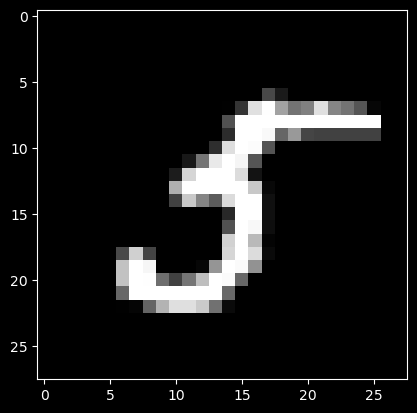

In [5]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)
# id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [6]:
train_x.shape

(60000, 28, 28)

In [7]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x = test_x.reshape([test_x.shape[0],-1])

In [8]:
train_x.shape

(60000, 784)

* min-max scaling

In [9]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 255 / min : 0


In [10]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

In [11]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 1.0 / min : 0.0


* target feature : One-hot Encoding

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [14]:
len_y = len(set(train_y))

In [15]:
train_y.shape

(60000,)

In [16]:
train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

In [17]:
train_y.shape

(60000, 10)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [18]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [19]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(train_x.shape[1])) )
model.add(keras.layers.Dense(10, activation='softmax') )

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
es = EarlyStopping(monitor='val_loss',              # 관측 대상
                   min_delta=0,                     # Threshold
                   patience=5,                      # 성능 개선되지 않더라도 몇 번 참을래?
                   verbose=1,                       # Earlystopping이 어디서 적용되는지
                   restore_best_weights=True)       # 가장 성능이 좋았던 epochs의 가중치를 쓸래!

In [22]:
model.fit(train_x, train_y, 
          validation_split=0.2,     # 검증데이터를 자체적으로 20% 분할하겠다.
          callbacks=[es],
          verbose=1, 
          epochs=50)

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5134 - accuracy: 0.8669 - val_loss: 0.3186 - val_accuracy: 0.9141
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3187 - accuracy: 0.9117 - val_loss: 0.2882 - val_accuracy: 0.9174
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2938 - accuracy: 0.9182 - val_loss: 0.2755 - val_accuracy: 0.9247
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.9218 - val_loss: 0.2732 - val_accuracy: 0.9249
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2740 - accuracy: 0.9227 - val_loss: 0.2666 - val_accuracy: 0.9277
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.9258 - val_loss: 0.2691 - val_accuracy: 0.9258
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2640 - accuracy: 0.9263 - val_loss: 0.2656 - val_accuracy:

In [36]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

313/313 [==============================] - 1s 2ms/step


In [37]:
pred_train

array([[9.16608389e-09, 2.71271233e-06, 1.00521618e-06, ...,
        3.03748937e-09, 5.72669137e-07, 2.52937134e-05],
       [9.99994516e-01, 6.23844754e-10, 1.73137164e-06, ...,
        2.34216486e-07, 2.94464144e-07, 5.57409351e-07],
       [1.25627586e-09, 3.50603909e-06, 8.75774120e-08, ...,
        1.37084228e-07, 6.36866071e-09, 9.93048488e-08],
       ...,
       [1.45055201e-09, 3.47971985e-09, 3.18082449e-09, ...,
        1.32990785e-10, 9.11939253e-07, 2.82786914e-06],
       [1.15251936e-07, 3.74826108e-08, 3.98378489e-07, ...,
        1.57140221e-08, 2.74571875e-07, 9.52809209e-09],
       [6.98005548e-04, 1.34544272e-04, 2.65388330e-03, ...,
        1.66244441e-04, 9.95909333e-01, 5.73584875e-05]], dtype=float32)

In [38]:
# argmax 축에 대해서 가장 큰 수를 추출
single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

In [39]:
logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 97.87%
테스트 정확도 : 97.12%


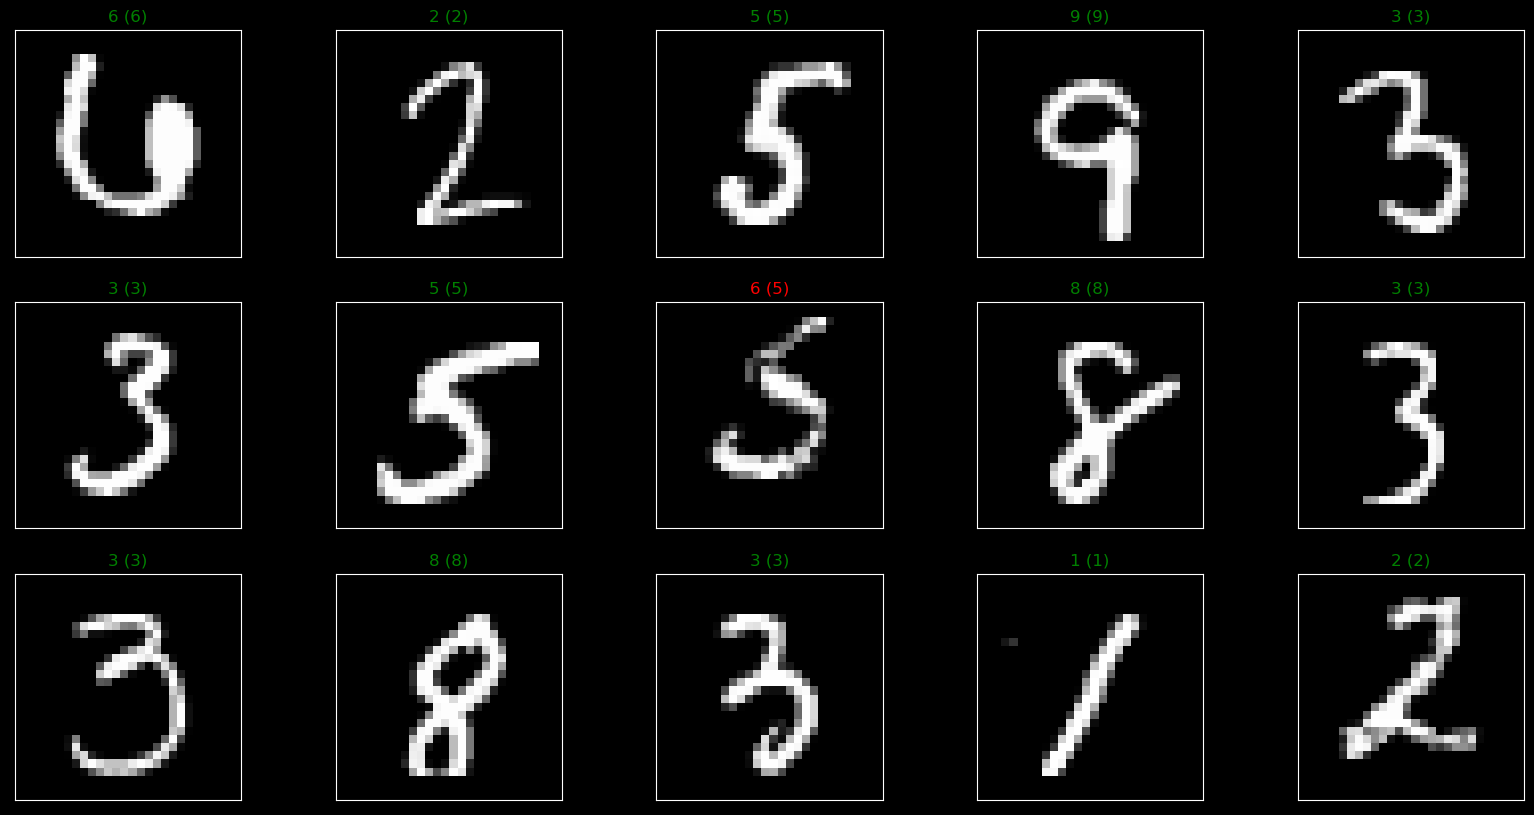

In [24]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 9634
다음 그림은 숫자 0 입니다.
모델의 예측 : 1
모델의 카테고리별 확률 : [ 7. 31. 19. 16.  0.  1.  1. 13.  7.  0.]
틀렸어요


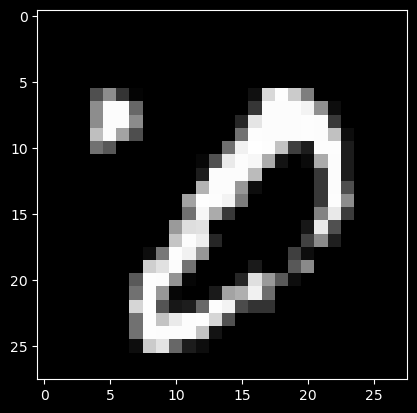

In [40]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [41]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0954 - accuracy: 0.9712


[0.09542268514633179, 0.9711999893188477]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [27]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [28]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(train_x.shape[1])) )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(10, activation='softmax') )

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,                  # loss가 0.1보다 크게 개선되지 않으면 참는 회수
                   verbose=1,
                   restore_best_weights=True)

In [31]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2246 - accuracy: 0.9311 - val_loss: 0.1201 - val_accuracy: 0.9633
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0976 - accuracy: 0.9704 - val_loss: 0.1009 - val_accuracy: 0.9705
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0686 - accuracy: 0.9791 - val_loss: 0.1125 - val_accuracy: 0.9690
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.1078 - val_accuracy: 0.9695
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.1075 - val_accuracy: 0.9701
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.1185 - val_accuracy: 0.9712
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.1050 - val_accuracy:

In [32]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 97.87%
테스트 정확도 : 97.12%


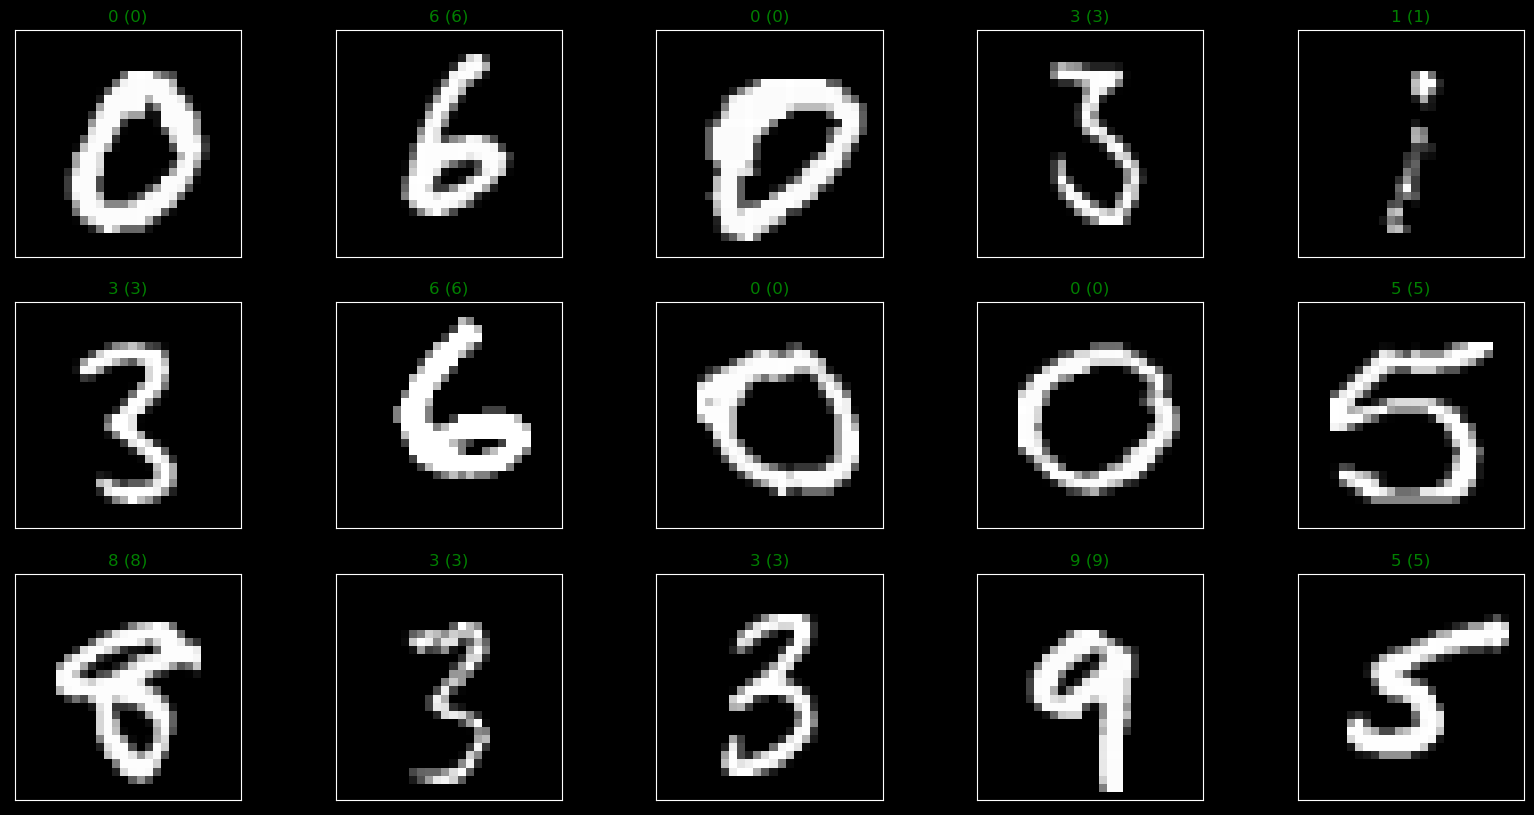

In [33]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 1260
다음 그림은 숫자 7 입니다.
모델의 예측 : 1
모델의 카테고리별 확률 : [ 0. 87.  0.  0.  0.  0.  0.  9.  0.  0.]
틀렸어요


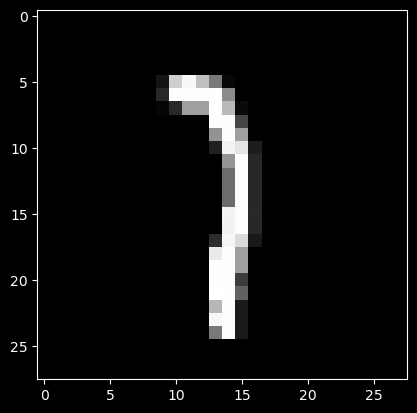

In [34]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [35]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0954 - accuracy: 0.9712


[0.09542268514633179, 0.9711999893188477]